### Name: Qiaoqiao Zou ###

# **Introduction**

Pumpkin seeds are frequently consumed as confection worldwide because of their adequate amount of protein, fat, carbohydrate, and mineral contents. This study was carried out on the two most important and quality types of pumpkin seeds, ‘‘Urgup_Sivrisi’’ and ‘‘Cercevelik’’, generally grown in Urgup and Karacaoren regions in Turkey. However, morphological measurements of 2500 pumpkin seeds of both varieties were made possible by using the gray and binary forms of threshold techniques. PCA and KernelPCA are used here to find the best model to classify pumpkin seeds.

This file is checked and bit modified version of https://www.kaggle.com/code/preciousosas/pumpkin-seed-classification
utilizing the Pumpkin seeds dataset https://www.kaggle.com/datasets/muratkokludataset/pumpkin-seeds-dataset/data

In [1]:
#import neccessary libary
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.svm import SVC
from sklearn.pipeline import Pipeline
from sklearn.decomposition import PCA
from sklearn.decomposition import KernelPCA
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import GridSearchCV,train_test_split
from sklearn.metrics import classification_report, confusion_matrix,ConfusionMatrixDisplay

In [2]:
import warnings
warnings.filterwarnings("ignore", category=RuntimeWarning)

In [3]:
seed = pd.read_excel('Pumpkin_Seeds_Dataset.xlsx')
seed.head()

,Area,Perimeter,Major_Axis_Length,Minor_Axis_Length,Convex_Area,Equiv_Diameter,Eccentricity,Solidity,Extent,Roundness,Aspect_Ration,Compactness,Class
0,56276,888.242,326.1485,220.2388,56831,267.6805,0.7376,0.9902,0.7453,0.8963,1.4809,0.8207,Çerçevelik
1,76631,1068.146,417.1932,234.2289,77280,312.3614,0.8275,0.9916,0.7151,0.8440,1.7811,0.7487,Çerçevelik
2,71623,1082.987,435.8328,211.0457,72663,301.9822,0.8749,0.9857,0.7400,0.7674,2.0651,0.6929,Çerçevelik
3,66458,992.051,381.5638,222.5322,67118,290.8899,0.8123,0.9902,0.7396,0.8486,1.7146,0.7624,Çerçevelik
4,66107,998.146,383.8883,220.4545,67117,290.1207,0.8187,0.9850,0.6752,0.8338,1.7413,0.7557,Çerçevelik


In [4]:
#check the data information to know if there is any null value
seed.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2500 entries, 0 to 2499
Data columns (total 13 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Area               2500 non-null   int64  
 1   Perimeter          2500 non-null   float64
 2   Major_Axis_Length  2500 non-null   float64
 3   Minor_Axis_Length  2500 non-null   float64
 4   Convex_Area        2500 non-null   int64  
 5   Equiv_Diameter     2500 non-null   float64
 6   Eccentricity       2500 non-null   float64
 7   Solidity           2500 non-null   float64
 8   Extent             2500 non-null   float64
 9   Roundness          2500 non-null   float64
 10  Aspect_Ration      2500 non-null   float64
 11  Compactness        2500 non-null   float64
 12  Class              2500 non-null   object 
dtypes: float64(10), int64(2), object(1)
memory usage: 254.0+ KB


In [5]:
seed.isnull().sum()

Area                 0
Perimeter            0
Major_Axis_Length    0
Minor_Axis_Length    0
Convex_Area          0
Equiv_Diameter       0
Eccentricity         0
Solidity             0
Extent               0
Roundness            0
Aspect_Ration        0
Compactness          0
Class                0
dtype: int64

In [6]:
seed.iloc[:,-1]

0          Çerçevelik
1          Çerçevelik
2          Çerçevelik
3          Çerçevelik
4          Çerçevelik
            ...      
2495    Ürgüp Sivrisi
2496    Ürgüp Sivrisi
2497    Ürgüp Sivrisi
2498    Ürgüp Sivrisi
2499    Ürgüp Sivrisi
Name: Class, Length: 2500, dtype: object

In [7]:
#check out the column names
seed.columns

Index(['Area', 'Perimeter', 'Major_Axis_Length', 'Minor_Axis_Length',
       'Convex_Area', 'Equiv_Diameter', 'Eccentricity', 'Solidity', 'Extent',
       'Roundness', 'Aspect_Ration', 'Compactness', 'Class'],
      dtype='object')

In [8]:
#set the x,y values
x = seed.drop('Class',axis=1)
y = seed['Class']

In [9]:
# So all 12 features in x
x.shape

(2500, 12)

In [10]:
#Unique values in the class column
seed['Class'].unique()

array(['Çerçevelik', 'Ürgüp Sivrisi'], dtype=object)

In [11]:
# Divide the original data into 3 parts
X_train, X_temp, y_train, y_temp = train_test_split(x, y, test_size=0.3, random_state=42)
X_val, X_test, y_val, y_test = train_test_split(X_temp, y_temp, test_size=0.5, random_state=42)
print(X_train.shape,y_train.shape)
print(X_val.shape,y_val.shape)
print(X_test.shape,y_test.shape)

(1750, 12) (1750,)
(375, 12) (375,)
(375, 12) (375,)


In [12]:
# Build Pipeline
pipe_pca = Pipeline([
    ('scaler', StandardScaler()),
    ('pca', PCA()),
    ('clf', SVC())
])

# Parameter grid: including n_components of PCA and kernel, C, gamma of SVC
param_grid_pca = {
    'pca__n_components': [3, 5, 7, 0.95],  
    'clf__kernel': ['linear', 'rbf', 'poly'],
    'clf__C': [0.1, 1, 10],
    'clf__gamma': ['scale', 0.01, 0.1],
    'clf__degree': [2, 3] # Only valid for poly, but GridSearch will automatically skip invalid combinations
}

# GridSearchCV
grid_pca = GridSearchCV(pipe_pca, param_grid_pca, cv=5, scoring='accuracy', n_jobs=-1)
grid_pca.fit(X_train, y_train)

# Output the best parameter combination found by GridSearch
print("Best Parameters:")
for param, value in grid_pca.best_params_.items():
    print(f"  {param}: {value}")

# Output validation set cross validation accuracy
print(f"\nValidation Accuracy (CV average): {grid_pca.best_score_:.4f}")

# Use Validation data to evaluate the final model effect (for comparison with other models)
val_acc_pca = grid_pca.best_estimator_.score(X_val, y_val)
print(f"Validation Accuracy (on X_val): {val_acc_pca:.4f}")


Best Parameters:
  clf__C: 0.1
  clf__degree: 2
  clf__gamma: scale
  clf__kernel: rbf
  pca__n_components: 5

Validation Accuracy (CV average): 0.8897
Validation Accuracy (on X_val): 0.8693


In [13]:
# Build Pipeline
pipeline_kpca = Pipeline([
    ("scaler", StandardScaler()),
    ("kpca", KernelPCA(fit_inverse_transform=False, eigen_solver="auto")),
    ("clf", SVC())
])

# Set up the parameter grid
param_grid_kpca = [
    {
        'kpca__n_components': [30, 40, 50],
        'kpca__kernel': ['rbf', 'sigmoid'],
        'kpca__gamma': [0.01, 0.1, 1],
        'clf__kernel': ['rbf'],
        'clf__C': [0.1, 1, 10],
        'clf__gamma': ['scale', 0.01, 0.1]
    },
    {
        'kpca__n_components': [30, 40, 50],
        'kpca__kernel': ['poly'],
        'kpca__gamma': [0.01, 0.1],
        'kpca__degree': [2, 3],
        'clf__kernel': ['poly'],
        'clf__C': [0.1, 1, 10],
        'clf__gamma': ['scale', 0.01, 0.1],
        'clf__degree': [2, 3]
    },
    {
        'kpca__n_components': [30, 40, 50],
        'kpca__kernel': ['rbf'],  # Still using rbf kernelPCA, but linear SVM
        'kpca__gamma': [0.01, 0.1, 1],
        'clf__kernel': ['linear'],
        'clf__C': [0.1, 1, 10]
    }
]

# GridSearchCV training
grid_kpca = GridSearchCV(pipeline_kpca, param_grid_kpca, cv=5, scoring='accuracy', n_jobs=-1)
grid_kpca.fit(X_train, y_train)

# Best Model Evaluation
print("Best Parameters:", grid_kpca.best_params_)
print("Validation Accuracy (CV average):", grid_kpca.best_score_)

# Validation set accuracy
val_acc_kpca = grid_kpca.best_estimator_.score(X_val, y_val)
print("Validation Accuracy:", val_acc_kpca)

Best Parameters: {'clf__C': 10, 'clf__gamma': 0.1, 'clf__kernel': 'rbf', 'kpca__gamma': 0.1, 'kpca__kernel': 'sigmoid', 'kpca__n_components': 50}
Validation Accuracy (CV average): 0.8914285714285715
Validation Accuracy: 0.8826666666666667


In [14]:
# Building a Pipeline
pipeline_finetune = Pipeline([
    ("scaler", StandardScaler()),
    ("kpca", KernelPCA(fit_inverse_transform=False, eigen_solver="auto")),
    ("clf", SVC())
])

# Fine-tune parameter ranges (fine-tune ranges based on previously found optimal parameters)
param_grid_finetune = [
    {
        'kpca__n_components': [50], # The best kpca__n_components
        'kpca__kernel': ['sigmoid'],  # The best performing kernel
        'kpca__gamma': [0.05, 0.1, 0.2],  # Fine-tune around the previous optimal gamma
        'clf__kernel': ['rbf'],  # Optimal clf kernel
        'clf__C': [5, 10, 20],  # Fine-tune around C=10
        'clf__gamma': [0.05, 0.1, 0.2]  # Also fine-tune gamma
    }
]

# Execute Fine-tuning GridSearch
grid_finetune = GridSearchCV(pipeline_finetune, param_grid_finetune, cv=5, scoring='accuracy', n_jobs=-1)
grid_finetune.fit(X_train, y_train)

# Output the best result
print("Fine-tuned Best Parameters:")
for k, v in grid_finetune.best_params_.items():
    print(f"  {k}: {v}")

print(f"\nValidation Accuracy (CV average): {grid_finetune.best_score_:.4f}")

val_acc_finetune = grid_finetune.best_estimator_.score(X_val, y_val)
print(f"Validation Accuracy (on X_val): {val_acc_finetune:.4f}")

Fine-tuned Best Parameters:
  clf__C: 10
  clf__gamma: 0.1
  clf__kernel: rbf
  kpca__gamma: 0.1
  kpca__kernel: sigmoid
  kpca__n_components: 50

Validation Accuracy (CV average): 0.8914
Validation Accuracy (on X_val): 0.8827


In [15]:
# Compare and select the best model
if val_acc_pca >= val_acc_finetune:
    best_model = grid_pca.best_estimator_
    model_name = "PCA + SVC"
    best_params = grid_pca.best_params_
    best_val_score = val_acc_pca
else:
    best_model = grid_finetune.best_estimator_
    model_name = "KernelPCA + SVC"
    best_params = grid_finetune.best_params_
    best_val_score = val_acc_finetune

# Use the test set for final evaluation
test_acc = best_model.score(X_test, y_test)

print(f"\nSelected Model: {model_name}")
print(f"Best Parameters: {best_params}")
print(f"Validation Accuracy: {best_val_score:.4f}")
print(f"Test Accuracy: {test_acc:.4f}")


Selected Model: KernelPCA + SVC
Best Parameters: {'clf__C': 10, 'clf__gamma': 0.1, 'clf__kernel': 'rbf', 'kpca__gamma': 0.1, 'kpca__kernel': 'sigmoid', 'kpca__n_components': 50}
Validation Accuracy: 0.8827
Test Accuracy: 0.8667


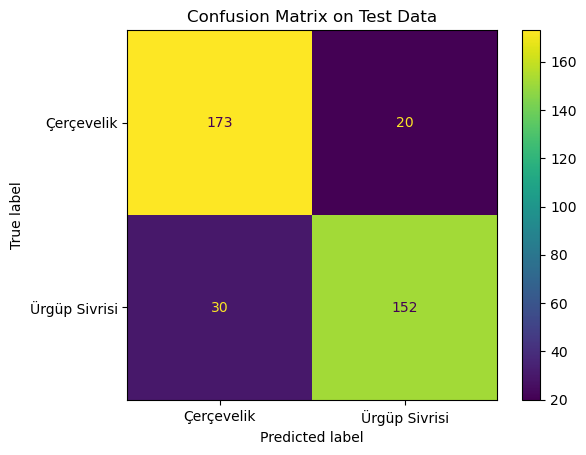

In [16]:
y_pred = best_model.predict(X_test)
cm = confusion_matrix(y_test, y_pred)
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=best_model.classes_)

disp.plot(cmap='viridis')
plt.title("Confusion Matrix on Test Data")
plt.show()